<a href="https://colab.research.google.com/github/catarina-moreira/capstone_proj13B/blob/main/Assement_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Step 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Load the CSV file
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Extract the uploaded file name
csv_file = list(uploaded.keys())[0]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file)

# Combine Title and Abstract columns for topic modeling
df['text'] = df['Title'].fillna('') + ". " + df['Abstract'].fillna('')

# Prepare sentence list
sentenceList = df['text'].tolist()

# Initialize the vectorizer (using ngrams for richer representation)
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Initialize BERTopic model
topic_model = BERTopic(calculate_probabilities=True, vectorizer_model=vectorizer_model)

# Fit the topic model
topics, probs = topic_model.fit_transform(sentenceList)

# Add the topics to the dataframe
df['topic'] = topics

# ---- Get Keywords Per Topic ----
topic_keywords = topic_model.get_topics()

# ---- Group by Year ----
yearly_topic_summary = {}

for year in sorted(df['Year'].dropna().unique()):
    year_df = df[df['Year'] == year]
    topic_counts = year_df['topic'].value_counts().to_dict()

    yearly_topics = []
    for topic_id, count in topic_counts.items():
        if topic_id == -1:
            continue
        keywords = [word for word, _ in topic_keywords.get(topic_id, [])][:5]
        yearly_topics.append({
            'topic_id': topic_id,
            'keywords': keywords,
            'count': count
        })

    yearly_topic_summary[year] = yearly_topics

# ---- Output Yearly Topics ----
for year, topics in yearly_topic_summary.items():
    print(f"\n📅 Year: {year}")
    for t in topics:
        print(f"  🔹 Topic {t['topic_id']} ({t['count']} papers): {', '.join(t['keywords'])}")

# ---- Visualizations ----
# Bar Chart showing the number of papers per topic
topic_model.visualize_barchart()

# Heatmap showing the similarity between topics
topic_model.visualize_heatmap()

# Hierarchical visualization of topics
topic_model.visualize_hierarchy()


Saving citations.csv to citations (1).csv

📅 Year: 2016
  🔹 Topic 5 (13 papers): special, special section, section, foreword, foreword special
  🔹 Topic 0 (9 papers): data, visualization, visual, analysis, visual analysis
  🔹 Topic 8 (5 papers): image, painting, color, paintings, colors
  🔹 Topic 15 (4 papers): meshes, grid, mesh, quad, faces
  🔹 Topic 11 (4 papers): curves, bzier, subdivision, surfaces, curve
  🔹 Topic 7 (3 papers): printing, 3d, material, structures, fabrication
  🔹 Topic 3 (3 papers): retrieval, 3d, shape, 3d object, object retrieval
  🔹 Topic 2 (3 papers): point, point cloud, cloud, segmentation, point clouds
  🔹 Topic 16 (3 papers): indoor, tracking, object tracking, devices, mobile devices
  🔹 Topic 9 (3 papers): illumination, global illumination, light, global, rendering
  🔹 Topic 23 (2 papers): skeletons, convolution surfaces, skeleton, shape, skeleton extraction
  🔹 Topic 12 (2 papers): depth, stereo, multiview, multiview stereo, scene
  🔹 Topic 14 (2 papers):

Saving citations.csv to citations (3).csv

📅 Year: 2016
  🔹 Topic 0 (49 papers): 3d, point, shape, surface, point cloud
  🔹 Topic 4 (11 papers): special, special section, section, foreword, foreword special
  🔹 Topic 10 (4 papers): image, painting, color, paintings, colors
  🔹 Topic 2 (4 papers): data, visualization, visual, analysis, analytics
  🔹 Topic 1 (3 papers): virtual, reality, virtual reality, vr, augmented
  🔹 Topic 11 (3 papers): illumination, light, global illumination, global, rendering
  🔹 Topic 12 (2 papers): vascular, aortic, aneurysms, flow, blood flow
  🔹 Topic 8 (2 papers): depth, stereo, multiview, multiview stereo, scene
  🔹 Topic 15 (2 papers): animation, animations, dance, motion, sign
  🔹 Topic 14 (2 papers): hand, gesture, gesture recognition, recognition, interaction
  🔹 Topic 9 (2 papers): crowd, crowd simulation, crowds, simulation, agents
  🔹 Topic 13 (1 papers): terrain, modeling, tree, trees, natural
  🔹 Topic 21 (1 papers): molecular, biology, visual, un


📊 Generating Topic Similarity Matrix...



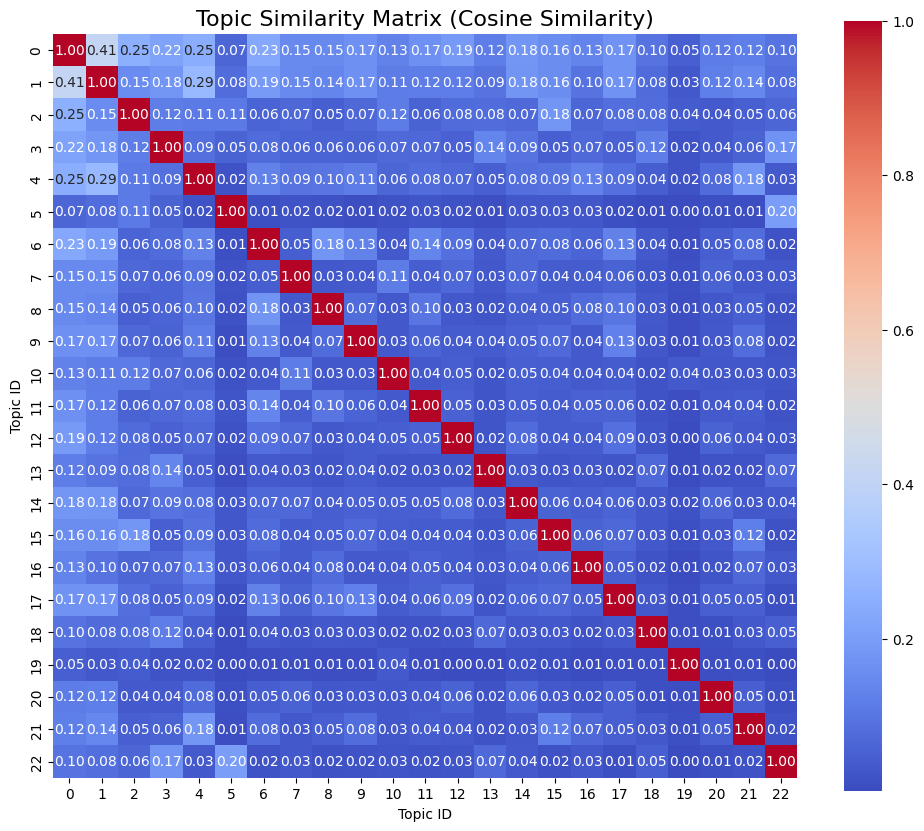

In [ ]:
# ===================== Step 1: Upload Dataset =====================
from google.colab import files
uploaded = files.upload()

# ===================== Step 2: Load and Prepare Data =====================
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load uploaded file
csv_file = list(uploaded.keys())[0]
df = pd.read_csv(csv_file)

# Combine Title and Abstract into one field for topic modeling
df['text'] = df['Title'].fillna('') + ". " + df['Abstract'].fillna('')
sentenceList = df['text'].tolist()

# ===================== Step 3: Fit BERTopic =====================
# Initialize CountVectorizer with ngrams for better topic richness
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Fit BERTopic model
topic_model = BERTopic(calculate_probabilities=True, vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(sentenceList)

# Add topic column to the DataFrame
df['topic'] = topics

# ===================== Step 4: Keywords per Year =====================
topic_keywords = topic_model.get_topics()


yearly_topic_summary = {}

for year in sorted(df['Year'].dropna().unique()):
    year_df = df[df['Year'] == year]
    topic_counts = year_df['topic'].value_counts().to_dict()

    yearly_topics = []
    for topic_id, count in topic_counts.items():
        if topic_id == -1:
            continue
        keywords = [word for word, _ in topic_keywords.get(topic_id, [])][:5]
        yearly_topics.append({
            'topic_id': topic_id,
            'keywords': keywords,
            'count': count
        })

    yearly_topic_summary[year] = yearly_topics

# Print yearly topic summaries
for year, topics in yearly_topic_summary.items():
    print(f"\n📅 Year: {year}")
    for t in topics:
        print(f"  🔹 Topic {t['topic_id']} ({t['count']} papers): {', '.join(t['keywords'])}")

# ===================== Step 5: BERTopic Visualizations =====================
print("\n🔍 Visualizing BERTopic Output...\n")
topic_model.visualize_barchart().show()
topic_model.visualize_heatmap().show()
topic_model.visualize_hierarchy().show()

# ===================== Step 6: Similarity Matrix =====================
print("\n📊 Generating Topic Similarity Matrix...\n")


topic_info = topic_model.get_topic_info()
valid_topic_ids = topic_info[topic_info.Topic != -1]["Topic"].tolist()


topic_embeddings = topic_model.c_tf_idf_.toarray()
filtered_embeddings = topic_embeddings[valid_topic_ids]


similarity_matrix = cosine_similarity(filtered_embeddings)
sim_df = pd.DataFrame(similarity_matrix, index=valid_topic_ids, columns=valid_topic_ids)

# Plot similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(sim_df, cmap="coolwarm", annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Topic Similarity Matrix (Cosine Similarity)", fontsize=16)
plt.xlabel("Topic ID")
plt.ylabel("Topic ID")
plt.show()

# ===================== END =====================


In [3]:
# ===================== Step 1: Upload CSV File =====================
from google.colab import files
uploaded = files.upload()

# ===================== Step 2: Load Data and Prep Text =====================
import pandas as pd
csv_file = list(uploaded.keys())[0]
df = pd.read_csv(csv_file)

# Combine title and abstract for modeling
df['text'] = df['Title'].fillna('') + '. ' + df['Abstract'].fillna('')
sentenceList = df['text'].tolist()

# ===================== Step 3: BERTopic Modeling =====================
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
topic_model = BERTopic(calculate_probabilities=True, vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(sentenceList)
df['topic'] = topics

# ===================== Step 4: Group Topics by Year =====================
topic_keywords = topic_model.get_topics()
df['Year'] = df['Year'].astype(str)


yearly_topic_summary = {}

for year in sorted(df['Year'].dropna().unique()):
    year_df = df[df['Year'] == year]
    topic_counts = year_df['topic'].value_counts().to_dict()

    yearly_topics = []
    for topic_id, count in topic_counts.items():
        if topic_id == -1:
            continue
        keywords = [word for word, _ in topic_keywords.get(topic_id, [])][:5]
        yearly_topics.append({
            'topic_id': topic_id,
            'keywords': keywords,
            'count': count
        })

    # Sort by count descending
    yearly_topics.sort(key=lambda x: x['count'], reverse=True)
    yearly_topic_summary[year] = yearly_topics

# ===================== Step 5: Build Table =====================
from tabulate import tabulate

table_data = []

for year, topics in yearly_topic_summary.items():
    for t in topics[:3]:
        table_data.append([
            year,
            t['topic_id'],
            ", ".join(t['keywords']),
            t['count']
        ])

headers = ["Year", "Topic ID", "Top Keywords", "Paper Count"]


print("\n📝 Markdown Table:\n")
print(tabulate(table_data, headers=headers, tablefmt="github"))


print("\n📄 LaTeX Table:\n")
print(tabulate(table_data, headers=headers, tablefmt="latex"))


table_df = pd.DataFrame(table_data, columns=headers)
table_df.to_csv("yearly_topic_summary.csv", index=False)
files.download("yearly_topic_summary.csv")


Saving citations.csv to citations (1).csv


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


📝 Markdown Table:

|   Year |   Topic ID | Top Keywords                                                  |   Paper Count |
|--------|------------|---------------------------------------------------------------|---------------|
|   2016 |          3 | special, special section, section, foreword, foreword special |            12 |
|   2016 |          0 | data, visualization, visual, analysis, visual analysis        |             9 |
|   2016 |          9 | image, painting, color, paintings, colors                     |             5 |
|   2017 |          0 | data, visualization, visual, analysis, visual analysis        |            10 |
|   2017 |          1 | virtual, reality, virtual reality, vr, augmented              |             8 |
|   2017 |          3 | special, special section, section, foreword, foreword special |             5 |
|   2018 |          1 | virtual, reality, virtual reality, vr, augmented              |            19 |
|   2018 |          3 | special, special sec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>